In [1]:
#author: Gabin ROUSSEAU
#Project: Computer simulation of a roadblock model of translational control



#I - Practice making a simple molecular dynamical system with a lone molecule A defined by:
# 0 -k1-> A, A-k2-> 0; d[A]_dt = k1 - k2[A] 

#The solver used here will be the scipy module scipy.integrate.solve_ivp set on the method RK45
#IMPORTANT: the "variable" y used by plt.solve_ivp looks at the state of the system. In other words, the changes over time of any factors part of the system must be expressed in a single ODE as system components
#Multivariable system example: Let the state of a system be defined by S(t)=[x(t), y(t)]
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy.integrate import solve_ivp

sns.set(style="darkgrid")



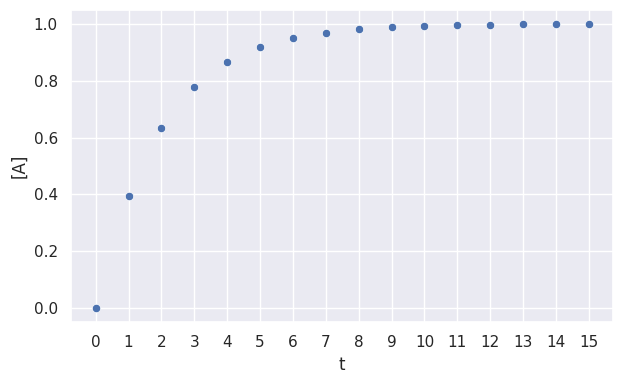

In [2]:
#STEP 1 ------------------------------------------------------------------

#Solver format: solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)
#fun: function to parse
#t_span: time interval calculated
#
k1=0.5
k2=0.5
#Each time unit corresponds to [A]+=0.5 AND [A]-=0.5*[A], so the equilibrium would be reached when [A]=1 with d[A]_dt = 0

dA_dt = lambda t, a: k1 - k2*a 
t_eval = np.arange(0, 16, 1)

#Changes of [A] over time if [A]ini=0
sol = solve_ivp(dA_dt, [0, 16], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
#plt.plot(sol.t, sol.y[0])
sns.scatterplot(x=sol.t, y=sol.y[0])
plt.xlabel('t')
plt.ylabel('[A]')
plt.xticks(t_eval)
plt.tight_layout()
plt.show();


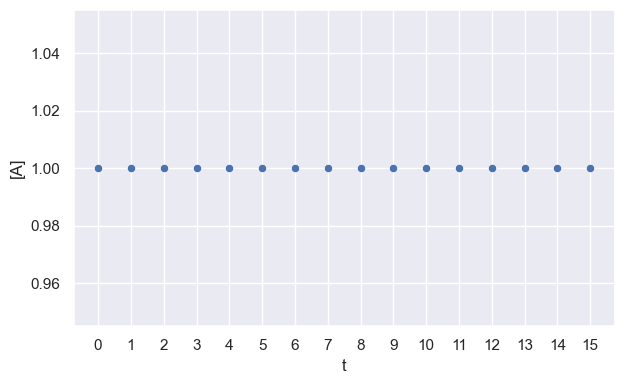

In [7]:
#[A]ini = 1
sol = solve_ivp(dA_dt, [0, 16], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
#plt.plot(sol.t, sol.y[0])
sns.scatterplot(x=sol.t, y=sol.y[0])
plt.xlabel('t')
plt.ylabel('[A]')
plt.xticks(t_eval)
plt.tight_layout()
plt.show();

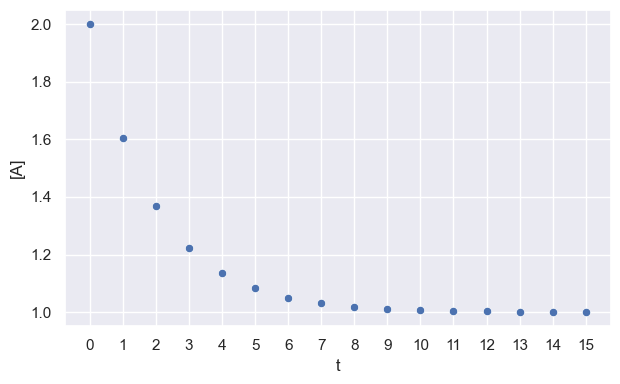

In [8]:
#[A]ini=2
sol = solve_ivp(dA_dt, [0, 16], [2], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
#plt.plot(sol.t, sol.y[0])
sns.scatterplot(x=sol.t, y=sol.y[0])
plt.xlabel('t')
plt.ylabel('[A]')
plt.xticks(t_eval)
plt.tight_layout()
plt.show();

In [ ]:
#STEP 2---------------------------------------------------

#Attempt a more complex state of system incorporating an autocatalysed molecule X that requires A for the reaction to occur:
#A + X -k3-> 2X, A + X <-k4- 2X; A reacts with X to form an additional X molecule, which is reversible
#Here, S will be the the system carrying as an array/list [A] and [X]
k3=0.5
k4=0.25

dS_dt = lambda t, s: [(k1 - k2*s[0]) + (k4*(s[1]**2) - k3*s[0]*s[1]), k3*s[0]*s[1] - k4*(s[1]**2)] #s[0], the first entry of the system, corresponds to A. Likewise s[1] is X, as reflect in the solver's initial system state
#dX_dt could be simplified by reducing k3*[A] to a single constant if A could be assumed to be in surplus under the law of mass-action (which would have to be another molecule than A in this model)
#since the dA_dt is influenced by the autocatalysis reaction in this scenario, the ODE for [A] gets more complicated by taking into account reactions involving X

t_eval = np.arange(0, 16, 1)

#Changes of S over time if [A]ini=0
sol = solve_ivp(dS_dt, [0, 16], [0,0.1], t_eval=t_eval)

solA = sol.y[0]
solX = sol.y[1] 

    
plt.figure(figsize = (12, 4))
plt.subplot(121)
sns.scatterplot(x=sol.t, y=solA, color="blue")
sns.scatterplot(x=sol.t, y=solX, color="orange")
plt.xlabel('t')
plt.ylabel('Concentration')
plt.xticks(t_eval)
plt.legend(labels=["A", "X"], title="Reaction Molecules")
plt.tight_layout()
plt.show();

: 

At t=1, the concentration of x is 1 and the concentration of y is 2


In [12]:
test=lambda s: [s[0]+1,s[1]+2]
t1=test([0,0])
print(f'At t=1, the concentration of x is {t1[0]} and the concentration of y is {t1[1]}')

0.0

In [18]:
sol.y

array([[0.        , 0.39350718, 0.63221524, 0.77680461, 0.86475222,
        0.91780606, 0.95027504, 0.96974226, 0.98163157, 0.98893514,
        0.99315051, 0.99585991, 0.9975179 , 0.99843233, 0.99903585,
        0.99941639],
       [0.1       , 0.10787996, 0.13516582, 0.18401658, 0.2601302 ,
        0.37037827, 0.51782588, 0.69817668, 0.8957228 , 1.08807128,
        1.25629014, 1.38815747, 1.48430745, 1.55009296, 1.59325251,
        1.62097561]])